<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h2><center>Deep Learning : Assignment 1 </center></h2>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No : 091</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>Sharath Vaidyanath</td>
    <td>2019HC04539</td>
  </tr>
    <td>Ramachandran N</td>
    <td>2019HC04537</td>
   <tr>
    <td>Hasthagiri Ganesh C V</td>
    <td>2019HC04323</td>
</table>

**Q2: Question No.2. NLP Dataset:**

**1.Import Libraries/Dataset**

In [1]:
##Import the required libraries and the dataset (use Google Drive if required).##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
##Check the GPU available (recommended- use free GPU provided by Google Colab)##
import tensorflow as tf
tf.test.gpu_device_name()

''

In [3]:
import os
imdb_dir = r"F:\M.tech\Study Materials\3rd Sem materials\Deep Learning\Assignment_1\aclImdb_v1\aclImdb\train"
train_dir = os.path.join(imdb_dir)

In [4]:
#Load the texts and add labels as ‘pos’ and ‘neg’
labels = []
texts = []

for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname),encoding='utf-8')
            texts.append(f.read())
            f.close
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

**2.Data Visualization**

In [5]:
#Print at least two texts from each class of the dataset(pos and neg), for a sanity check that labels match the text.
print("Pos: \n")
print('Label: ',labels[22001])
print(texts[22001])
print("\n")
print('Label: ',labels[22003])
print(texts[22003])
print("\n")
#############
print("Neg")
print('Label: ',labels[5])
print(texts[5])
print("\n")
print('Label: ',labels[7])
print(texts[7])

Pos: 

Label:  1
When I heard about "Hammerhead" being released on DVD and finally found it at my local DVD store, I thought "well, just another cheap monster movie from Nu Image". Those guys around Boaz Davidson and Avi Lerner produced cheap but very entertaining B - Pictures in the past few months but also some very disappointing movies. So I didn't expect much, especially after having watched the rather disappointing "Shark Zone" just a few days before. But "Hammerhead" turned out to be an excellent revival of the 1950s monster movies. We have a mad scientist, a group of people in a dangerous situation, screaming women and damsels in distress, man-eating plants and of course we have the creature, a huge mutant mix between a man and a hammerhead shark. Everything you need for an entertaining monster movie. The only thing missing are graphic sex scenes and nudity which you expect in movies of this kind, but since the movie was made for TV it's understandable why these scenes are missi

In [7]:
#Print the shapes of train and test data.
from tensorflow.keras.preprocessing.text import Tokenizer
words = 10000
tokenizer = Tokenizer(num_words = words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index

sequences[22003][:10]

from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = 100
data = pad_sequences(sequences,maxlen=max_length)
print("The data shaps is :",data.shape)

labels = np.asarray(labels)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

training_samples = 15000
validation_samples = 5000
test_samples = 5000

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_test = data[:test_samples]
y_test = labels[:test_samples]
print("\n")
print("The Train data shape is : ", x_train.shape, "and", y_train.shape)
print("The Test data shape is : ", x_test.shape, "and", y_test.shape)

The data shaps is : (25000, 100)


The Train data shape is :  (15000, 100) and (15000,)
The Test data shape is :  (5000, 100) and (5000,)


**3.Data Pre-processing**

In [8]:
#Need for this Step - Since the models we use cannot accept string inputs or cannot be of the string format. 
#We have to come up with a way of handling this step. 
#The discussion of different ways of handling this step is out of the scope of this assignment.
#Please use this pre-trained embedding layer (Links to an external site.) from TensorFlow hub for this assignment. 
#This link also has a code snippet on how to convert a sentence to a vector. 
#Refer to that for further clarity on this subject.

#train data
import os
imdb_dir_1 = r"F:\M.tech\Study Materials\3rd Sem materials\Deep Learning\Assignment_1\aclImdb_v1\aclImdb\train"
train_dir_1 = os.path.join(imdb_dir_1)

embeddings_index = {}

for label_type_1 in ['neg','pos']:
    dir_name_1 = os.path.join(train_dir_1, label_type_1)
    for fname in os.listdir(dir_name_1):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name_1,fname),encoding='UTF-8')
            for line in f:
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[1:])
                embeddings_index[word] = coefs
            f.close()

print('There are %s word-vector.' % len(embeddings_index))

There are 4027 word-vector.


In [9]:
#for test data

import os
imdb_dir_2 = r"F:\M.tech\Study Materials\3rd Sem materials\Deep Learning\Assignment_1\aclImdb_v1\aclImdb\test"
train_dir_2 = os.path.join(imdb_dir_2)

embeddings_index_test = {}

for label_type_2 in ['neg','pos']:
    dir_name_2 = os.path.join(train_dir_2, label_type_2)
    for fname_1 in os.listdir(dir_name_2):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name_2,fname_1),encoding='UTF-8')
            for line in f:
                values_1 = line.split()
                word_1 = values_1[0]
                coefs_1 = np.asarray(values_1[1:])
                embeddings_index_test[word_1] = coefs_1
            f.close()

print('There are %s word-vector.' % len(embeddings_index_test))

There are 3933 word-vector.


**4.Model Building**

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten,Dense,Dropout,Embedding
from tensorflow.keras.regularizers import l2

In [11]:
#Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. 
#Choose the best number for hidden units and give reasons.
#Add L2 regularization to all the layers.
#Add one layer of dropout at the appropriate position and give reasons.
#Choose the appropriate activation function for all the layers.

embedding_dim = 100

model=Sequential()
model.add(Embedding(words,embedding_dim,input_length=max_length))
model.add(Flatten())
## Layer 1
model.add(Dense(70, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'relu'))
model.add(Dropout(0.2))
## Layer 2
model.add(Dense(50, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'relu'))
model.add(Dropout(0.2))
## Layer 3
model.add(Dense(20, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'relu'))
model.add(Dropout(0.2))
## Final Layer
model.add(Dense(1,activation='sigmoid'))

In [12]:
#Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 70)                700070    
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1

**5.Model Compilation**

In [13]:
#Compile the model with the appropriate loss function.
#Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
#Use accuracy as a metric
model.compile(loss='binary_crossentropy',optimizer='adam', metrics='accuracy')

**6.Model Training**

In [14]:
#Train the model for an appropriate number of epochs. 
#Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
import time
start = time.time()
history = model.fit(x=x_train,y=y_train,epochs=25,batch_size=256,validation_data=(x_val,y_val))

Epoch 1/25
59/59 [==============================] - 11s 193ms/step - loss: 1.4817 - accuracy: 0.5377 - val_loss: 1.0953 - val_accuracy: 0.6826
Epoch 2/25
59/59 [==============================] - 7s 119ms/step - loss: 0.9212 - accuracy: 0.7633 - val_loss: 0.7175 - val_accuracy: 0.8284
Epoch 3/25
59/59 [==============================] - 7s 110ms/step - loss: 0.5967 - accuracy: 0.8773 - val_loss: 0.6002 - val_accuracy: 0.8374
Epoch 4/25
59/59 [==============================] - 6s 108ms/step - loss: 0.3920 - accuracy: 0.9500 - val_loss: 0.5795 - val_accuracy: 0.8404
Epoch 5/25
59/59 [==============================] - 8s 135ms/step - loss: 0.2870 - accuracy: 0.9805 - val_loss: 0.5623 - val_accuracy: 0.8428
Epoch 6/25
59/59 [==============================] - 9s 146ms/step - loss: 0.2298 - accuracy: 0.9911 - val_loss: 0.5418 - val_accuracy: 0.8394
Epoch 7/25
59/59 [==============================] - 8s 134ms/step - loss: 0.1978 - accuracy: 0.9947 - val_loss: 0.5255 - val_accuracy: 0.8462
Epoch

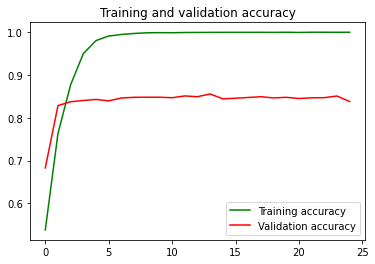

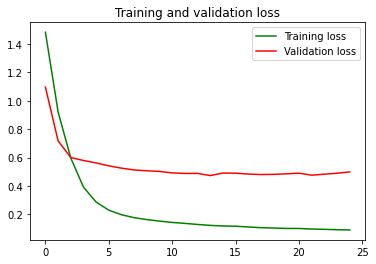

In [15]:
#Plot the loss and accuracy history graphs for both train and validation set. 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
print("\n")
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
#Print the total time taken for training.
print("Total time taken during trainig is : ", time.time() - start, "seconds")

Total time taken during trainig is :  317.70690536499023 seconds


**7.Model Evaluation**

In [17]:
#Print the final train and validation loss and accuracy. 
#Analyze and report the best and worst performing class.
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4991644620895386
Test accuracy: 0.8378000259399414


In [18]:
#Print the two most incorrectly classified texts for each class in the test dataset.
text = 'It is a really nice day. The weather is calm and cool. Something really great happened today! India won the cricket match!'
seq_gen = tokenizer.texts_to_sequences([text])
print('raw seq:',seq_gen)
seq_gen = pad_sequences(seq_gen, maxlen=max_length)
print('padded seq:',seq_gen)
prediction = model.predict(seq_gen)
print('positivity:',prediction)

raw seq: [[9, 6, 3, 63, 324, 248, 1, 5825, 6, 4865, 2, 644, 139, 63, 84, 572, 638, 2848, 1198, 1, 1012]]
padded seq: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    9    6    3   63  324
   248    1 5825    6 4865    2  644  139   63   84  572  638 2848 1198
     1 1012]]
positivity: [[0.9845675]]


In [19]:
text_1 = 'It is a really worst day. It is freezing cold out there. A lot of bad and criminal activities occured in the country today!!'
seq_gen_1 = tokenizer.texts_to_sequences([text_1])
print('raw seq:',seq_gen_1)
seq_gen_1 = pad_sequences(seq_gen_1, maxlen=max_length)
print('padded seq:',seq_gen_1)
prediction_1 = model.predict(seq_gen_1)
print('positivity:',prediction_1)

raw seq: [[9, 6, 3, 63, 246, 248, 9, 6, 1040, 43, 47, 3, 173, 4, 75, 2, 1675, 4974, 8, 1, 701, 638]]
padded seq: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    9    6    3   63  246  248
     9    6 1040   43   47    3  173    4   75    2 1675 4974    8    1
   701  638]]
positivity: [[0.3507291]]


In [20]:
#Predictions
y_probs = model.predict(x_test)
y_preds = y_probs.argmax(axis = 1)

In [21]:
#Print confusion matrix and classification report for the validation dataset.
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report : \n")
print(classification_report(y_test,y_preds))

Classification Report : 

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      2484
           1       0.00      0.00      0.00      2516

    accuracy                           0.50      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.25      0.50      0.33      5000



In [22]:
print("Confusion Matrix : \n")
print(confusion_matrix(y_test,y_preds))

Confusion Matrix : 

[[2484    0]
 [2516    0]]


**Hyperparameter Tuning**

**1. Batch Size: Change the value of batch size in model training**

In [23]:
def create_model_2():
    embedding_dim = 100

    model=Sequential()
    model.add(Embedding(words,embedding_dim,input_length=max_length))
    model.add(Flatten())
    ## Layer 1
    model.add(Dense(70, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'relu'))
    model.add(Dropout(0.2))
    ## Layer 2
    model.add(Dense(50, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'relu'))
    model.add(Dropout(0.2))
    ## Layer 3
    model.add(Dense(20, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'relu'))
    model.add(Dropout(0.2))
    ## Final Layer
    model.add(Dense(1,activation='sigmoid'))
    
    ##complie
    model.compile(loss='binary_crossentropy',optimizer='adam', metrics='accuracy')
    
    return model

In [24]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
seed = 7
np.random.seed(seed)

model_init_batch_epoch_CV = KerasClassifier(build_fn=create_model_2, verbose=1)

batches = [128,256, 512]

In [25]:
param_grid = dict(batch_size=batches)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train, validation_data=(x_val,y_val))

118/118 [==============================] - 13s 110ms/step - loss: 1.2383 - accuracy: 0.5817 - val_loss: 0.8530 - val_accuracy: 0.7840


In [26]:
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.7075999975204468 using {'batch_size': 128}
 mean=0.7076, std=0.004673 using {'batch_size': 128}
 mean=0.621, std=0.04069 using {'batch_size': 256}
 mean=0.5217, std=0.01733 using {'batch_size': 512}


**Model 1 - Model Buliding with new parameters**

In [28]:
#Model Compilation 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics='accuracy')

In [29]:
##Model Training
history_bs = model.fit(x=x_train,y=y_train,epochs=25,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/25
118/118 [==============================] - 11s 92ms/step - loss: 0.1087 - accuracy: 0.9985 - val_loss: 0.5202 - val_accuracy: 0.8428
Epoch 2/25
118/118 [==============================] - 10s 85ms/step - loss: 0.1047 - accuracy: 0.9989 - val_loss: 0.5333 - val_accuracy: 0.8422
Epoch 3/25
118/118 [==============================] - 11s 95ms/step - loss: 0.1006 - accuracy: 0.9985 - val_loss: 0.6037 - val_accuracy: 0.8312
Epoch 4/25
118/118 [==============================] - 10s 85ms/step - loss: 0.1032 - accuracy: 0.9991 - val_loss: 0.5170 - val_accuracy: 0.8412
Epoch 5/25
118/118 [==============================] - 11s 97ms/step - loss: 0.0982 - accuracy: 0.9984 - val_loss: 0.5451 - val_accuracy: 0.8384
Epoch 6/25
118/118 [==============================] - 10s 86ms/step - loss: 0.0991 - accuracy: 0.9988 - val_loss: 0.5352 - val_accuracy: 0.8410
Epoch 7/25
118/118 [==============================] - 10s 87ms/step - loss: 0.1058 - accuracy: 0.9983 - val_loss: 0.6119 - val_accuracy:

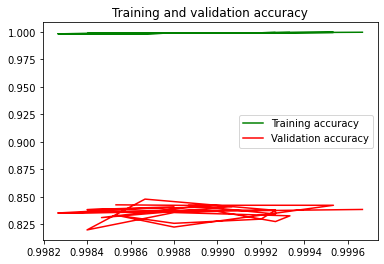

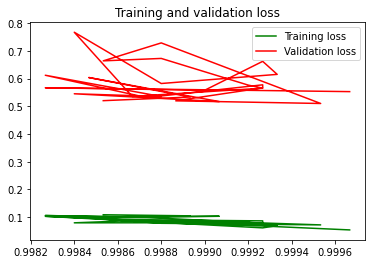

In [30]:
accuracy_bs = history_bs.history['accuracy']
val_accuracy_bs = history_bs.history['val_accuracy']
loss_bs = history_bs.history['loss']
val_loss_bs = history_bs.history['val_loss']
epochs_bs = accuracy_bs
plt.plot(epochs_bs, accuracy_bs, 'g', label='Training accuracy')
plt.plot(epochs_bs, val_accuracy_bs, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
print("\n")
plt.plot(epochs_bs, loss_bs, 'g', label='Training loss')
plt.plot(epochs_bs, val_loss_bs, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
#Model Evaluation
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5528250336647034
Test accuracy: 0.8385999798774719


In [32]:
text = 'It is a really nice day. The weather is calm and cool. Something really great happened today! India won the cricket match!'
seq_gen = tokenizer.texts_to_sequences([text])
print('raw seq:',seq_gen)
seq_gen = pad_sequences(seq_gen, maxlen=max_length)
print('padded seq:',seq_gen)
prediction = model.predict(seq_gen)
print('positivity:',prediction)

raw seq: [[9, 6, 3, 63, 324, 248, 1, 5825, 6, 4865, 2, 644, 139, 63, 84, 572, 638, 2848, 1198, 1, 1012]]
padded seq: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    9    6    3   63  324
   248    1 5825    6 4865    2  644  139   63   84  572  638 2848 1198
     1 1012]]
positivity: [[0.99691737]]


In [33]:
text_1 = 'It is a really worst day. It is freezing cold out there. A lot of bad and criminal activities occured in the country today!!'
seq_gen_1 = tokenizer.texts_to_sequences([text_1])
print('raw seq:',seq_gen_1)
seq_gen_1 = pad_sequences(seq_gen_1, maxlen=max_length)
print('padded seq:',seq_gen_1)
prediction_1 = model.predict(seq_gen_1)
print('positivity:',prediction_1)

raw seq: [[9, 6, 3, 63, 246, 248, 9, 6, 1040, 43, 47, 3, 173, 4, 75, 2, 1675, 4974, 8, 1, 701, 638]]
padded seq: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    9    6    3   63  246  248
     9    6 1040   43   47    3  173    4   75    2 1675 4974    8    1
   701  638]]
positivity: [[0.70832443]]


In [34]:
#Predictions
y_probs = model.predict(x_test)
y_preds = y_probs.argmax(axis = 1)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report : \n")
print(classification_report(y_test,y_preds))

Classification Report : 

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      2484
           1       0.00      0.00      0.00      2516

    accuracy                           0.50      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.25      0.50      0.33      5000



In [36]:
print("Confusion Matrix : \n")
print(confusion_matrix(y_test,y_preds))

Confusion Matrix : 

[[2484    0]
 [2516    0]]


**2.Dropout: Change the position and value of dropout layer**

In [37]:
def create_model_3(dropout_rate=0.2):
    embedding_dim = 100

    model2=Sequential()
    model2.add(Embedding(words,embedding_dim,input_length=max_length))
    model2.add(Flatten())
    ## Layer 1
    model2.add(Dense(70, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'relu'))
    model2.add(Dropout(dropout_rate))
    ## Layer 2
    model2.add(Dense(50, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'relu'))
    model2.add(Dropout(dropout_rate))
    ## Layer 3
    model2.add(Dense(20, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'relu'))
    model2.add(Dropout(dropout_rate))
    ## Final Layer
    model2.add(Dense(1,activation='sigmoid'))
    
    ##complie
    model2.compile(loss='binary_crossentropy',optimizer='adam', metrics='accuracy')
    
    return model2

In [38]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
seed = 7
np.random.seed(seed)

model_init_batch_dp_CV = KerasClassifier(build_fn=create_model_3, verbose=1)

dp_n=[0.2,0.4]

In [39]:
param_grid_1 = dict(dropout_rate=dp_n)
grid_1 = GridSearchCV(estimator=model_init_batch_dp_CV, param_grid=param_grid_1, cv=3)
grid_result = grid_1.fit(x_train, y_train, validation_data=(x_val,y_val))

469/469 [==============================] - 43s 92ms/step - loss: 0.8635 - accuracy: 0.5181 - val_loss: 0.6936 - val_accuracy: 0.5110


In [40]:
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.5916000107924143 using {'dropout_rate': 0.2}
 mean=0.5916, std=0.1375 using {'dropout_rate': 0.2}
 mean=0.5071, std=0.006931 using {'dropout_rate': 0.4}


**Model 2 - Change the position and value of dropout layer**

In [41]:
#Model Building 
embedding_dim = 100

model=Sequential()
model.add(Embedding(words,embedding_dim,input_length=max_length))
model.add(Flatten())
## Layer 1
model.add(Dense(70, activation = 'relu'))
model.add(Dropout(0.2))
## Layer 2
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.2))
## Layer 3
model.add(Dense(20, activation = 'relu'))
model.add(Dropout(0.2))
## Final Layer
model.add(Dense(1,activation='sigmoid'))

In [42]:
#Model Compilation 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics='accuracy')

In [43]:
#Model Training 
history_np = model.fit(x=x_train,y=y_train,epochs=25,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/25
118/118 [==============================] - 12s 100ms/step - loss: 0.5912 - accuracy: 0.6617 - val_loss: 0.3856 - val_accuracy: 0.8314
Epoch 2/25
118/118 [==============================] - 12s 98ms/step - loss: 0.2247 - accuracy: 0.9159 - val_loss: 0.4299 - val_accuracy: 0.8256
Epoch 3/25
118/118 [==============================] - 12s 102ms/step - loss: 0.0318 - accuracy: 0.9909 - val_loss: 0.7079 - val_accuracy: 0.8282
Epoch 4/25
118/118 [==============================] - 11s 97ms/step - loss: 0.0029 - accuracy: 0.9997 - val_loss: 0.9691 - val_accuracy: 0.8262
Epoch 5/25
118/118 [==============================] - 10s 84ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 1.0925 - val_accuracy: 0.8218
Epoch 6/25
118/118 [==============================] - 11s 90ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 1.0463 - val_accuracy: 0.8088
Epoch 7/25
118/118 [==============================] - 11s 96ms/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.9895 - val_accurac

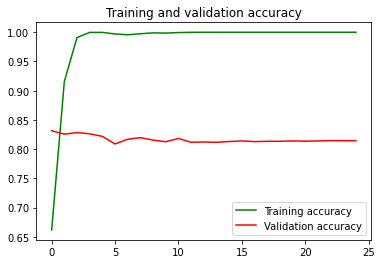

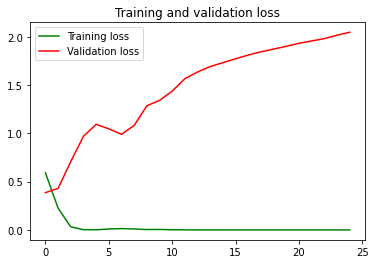

In [44]:
accuracy_np = history_np.history['accuracy']
val_accuracy_np = history_np.history['val_accuracy']
loss_np = history_np.history['loss']
val_loss_np = history_np.history['val_loss']
epochs_np = range(len(accuracy_np))
plt.plot(epochs_np, accuracy_np, 'g', label='Training accuracy')
plt.plot(epochs_np, val_accuracy_np, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
print("\n")
plt.plot(epochs_np, loss_wr, 'g', label='Training loss')
plt.plot(epochs_np, val_loss_np, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [45]:
#Model Evaluation 
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.046025514602661
Test accuracy: 0.8144000172615051


In [46]:
text = 'It is a really nice day. The weather is calm and cool. Something really great happened today! India won the cricket match!'
seq_gen = tokenizer.texts_to_sequences([text])
print('raw seq:',seq_gen)
seq_gen = pad_sequences(seq_gen, maxlen=max_length)
print('padded seq:',seq_gen)
prediction = model.predict(seq_gen)
print('positivity:',prediction)

raw seq: [[9, 6, 3, 63, 324, 248, 1, 5825, 6, 4865, 2, 644, 139, 63, 84, 572, 638, 2848, 1198, 1, 1012]]
padded seq: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    9    6    3   63  324
   248    1 5825    6 4865    2  644  139   63   84  572  638 2848 1198
     1 1012]]
positivity: [[1.]]


In [47]:
text_1 = 'It is a really worst day. It is freezing cold out there. A lot of bad and criminal activities occured in the country today!!'
seq_gen_1 = tokenizer.texts_to_sequences([text_1])
print('raw seq:',seq_gen_1)
seq_gen_1 = pad_sequences(seq_gen_1, maxlen=max_length)
print('padded seq:',seq_gen_1)
prediction_1 = model.predict(seq_gen_1)
print('positivity:',prediction_1)

raw seq: [[9, 6, 3, 63, 246, 248, 9, 6, 1040, 43, 47, 3, 173, 4, 75, 2, 1675, 4974, 8, 1, 701, 638]]
padded seq: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    9    6    3   63  246  248
     9    6 1040   43   47    3  173    4   75    2 1675 4974    8    1
   701  638]]
positivity: [[0.98863184]]


In [48]:
#Predictions
y_probs = model.predict(x_test)
y_preds = y_probs.argmax(axis = 1)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report : \n")
print(classification_report(y_test,y_preds))

Classification Report : 

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      2484
           1       0.00      0.00      0.00      2516

    accuracy                           0.50      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.25      0.50      0.33      5000



In [50]:
print("Confusion Matrix : \n")
print(confusion_matrix(y_test,y_preds))

Confusion Matrix : 

[[2484    0]
 [2516    0]]
